### Задание

1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

2. (*) Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

3. (*) Модифицировать алгоритм градиетного бустинга, взяв за основу реализацию решающего дерева из ДЗ_4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes


In [10]:
import matplotlib.pyplot as plt


In [66]:
import random

In [4]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [8]:
def bias(z, y):
    return 2 * (z - y)

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [13]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [14]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [15]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1095
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 4845


In [134]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('N_iter')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

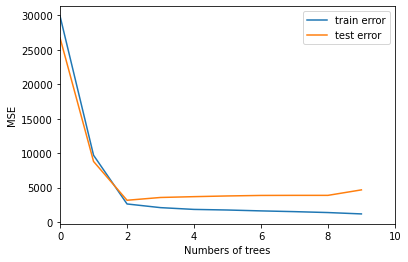

In [18]:
get_error_plot(n_trees, train_errors, test_errors)

### Задание 1. 
**пропишем в цикле 10 вариантов количества деревьев, для каждого случая сохраним значения ошибки**

In [46]:


# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.5
numbers_of_trees = []
list_train_error = []
list_test_error = []

for i in range(1, 25):
    n_trees = i
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, 
                                              coefs, eta)
    numbers_of_trees.append(i)
    list_train_error.append(train_errors[-1])
    list_test_error.append(test_errors[-1])
    
    

In [50]:
list_test_error

[26711.73873873874,
 8789.851721413683,
 3158.4728837043604,
 3563.0230177912404,
 3682.128727314286,
 3784.307268685129,
 3858.765098597288,
 3870.601715089209,
 3870.0210347253296,
 4665.254416596525,
 4845.002593651869,
 4853.867450046313,
 4818.961086699831,
 5000.685633143576,
 4999.312568691204,
 4742.101394984896,
 4956.491590551057,
 4993.345029837309,
 5064.905563269476,
 5186.735841476306,
 5142.167492244509,
 5136.526569258723,
 5117.222013278429,
 5048.357134800358]

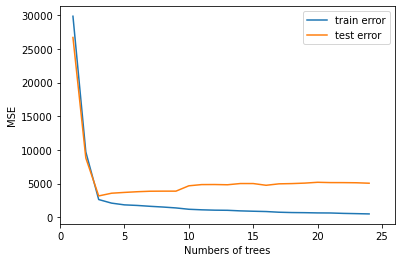

In [49]:
#зависимость ошибки от коичества деревьев прификсированной глубине = 3
plt.xlabel('Numbers of trees')
plt.ylabel('MSE')
plt.xlim(0, n_trees+2)
plt.plot(numbers_of_trees, list_train_error, label='train error')
plt.plot(numbers_of_trees, list_test_error, label='test error')
plt.legend(loc='upper right')
plt.show()

Видим, что на тесте после определённого количества (3) ошибка минимальна, затем слегка растёт, т.е. наблюдается небольшое переобучение.

In [59]:
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев

# Шаг
eta = 0.5
numbers_of_depth = []
list_train_error = []
list_test_error = []

for i in range(1, 11):
    max_depth = i    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, 
                                              coefs, eta)
    numbers_of_depth.append(i)
    list_train_error.append(train_errors[-1])
    list_test_error.append(test_errors[-1])

In [60]:
list_test_error

[3029.4091324212986,
 3140.9878416093375,
 3158.4728837043604,
 3972.9455328408108,
 3477.867136460865,
 4045.7469469189205,
 4468.723043110431,
 5685.33022007347,
 4689.757866070879,
 4038.893754103833]

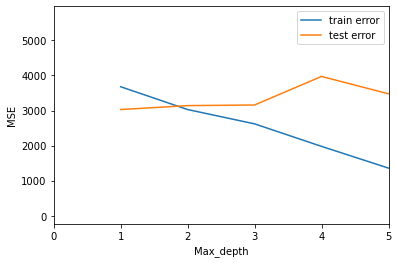

In [62]:
#зависимость ошибки от глубины при фиксированном количестве деревьев = 3
plt.xlabel('Max_depth')
plt.ylabel('MSE')
plt.xlim(0, n_trees+2)
plt.plot(numbers_of_depth, list_train_error, label='train error')
plt.plot(numbers_of_depth, list_test_error, label='test error')
plt.legend(loc='upper right')
plt.show()

Видим, что в отличие от количества деревьев, с ростом глубины на тесте ошибка только растёт, т.е. алгоритм сразу вышел на около минимальное значение ошибки и затем только колеблется вокруг этого значения с небольшим переобучением.

Можно сделать вывод, что алгоритм более чувствителен к параметру как количество деревьев, чем их глубина.

2. (*) Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [136]:
def stoch_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    random.seed(42)
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        #выбираем половину данных для обучения
        shuffle_index = np.random.permutation(X_train.shape[0])#случайно смешиваем индексы
        shuffle_index = shuffle_index[:int(shuffle_index.shape[0]/2)]
        X_train_shuffle, y_train_shuffle = X_train[shuffle_index], y_train[shuffle_index]
        
        shuffle_index1 = np.random.permutation(X_test.shape[0])#случайно смешиваем индексы
        shuffle_index1 = shuffle_index1[:int(shuffle_index1.shape[0]/2)]
        X_test_shuffle, y_test_shuffle = X_test[shuffle_index1], y_test[shuffle_index1]
        
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_shuffle, y_train_shuffle)
            
            train_errors.append(mean_squared_error(y_train_shuffle, gb_predict(X_train_shuffle, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_shuffle, gb_predict(X_test_shuffle, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train_shuffle, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_shuffle, bias(y_train_shuffle, target))
            
            train_errors.append(mean_squared_error(y_train_shuffle, gb_predict(X_train_shuffle, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_shuffle, gb_predict(X_test_shuffle, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [130]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.5

trees, train_errors, test_errors = stoch_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [131]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [132]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 6009
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 9559


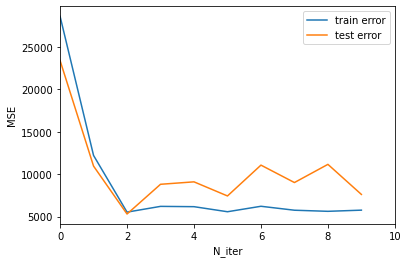

In [135]:
get_error_plot(n_trees, train_errors, test_errors)

У меня качество не улучшилось, видимо, что-то не совсем верно я оформил.

3. (*) Модифицировать алгоритм градиетного бустинга, взяв за основу реализацию решающего дерева из ДЗ_4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.